In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import gc

In [17]:
data_links = pd.read_csv('/home/parth/Documents/links.csv')
data_movies = pd.read_csv('/home/parth/Documents/movies.csv')
data_ratings = pd.read_csv('/home/parth/Documents/ratings.csv.zip')
data_tags = pd.read_csv('/home/parth/Documents/tags.csv')

In [18]:
data_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [19]:
data_links.head(5)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [20]:
data_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [21]:
data_movies.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
data_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
data_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [25]:
data_tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [26]:
data_links['tmdbId'].fillna(-1, inplace=True)

/tmp/ipykernel_24300/657737349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_links['tmdbId'].fillna(-1, inplace=True)


In [27]:
#merging Dataset
merged_data = pd.merge(data_ratings, data_movies, on='movieId')

In [28]:
merged_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [30]:
#removing | from genres
merged_data['genres'] = merged_data['genres'].apply(lambda x: ' '.join(sorted(x.split('|'))))


In [31]:
merged_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy Romance
2,1,6,4.0,964982224,Heat (1995),Action Crime Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime Mystery Thriller


In [32]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [33]:
class MovieDataset(Dataset):
    """Custom Dataset for loading movie ratings"""
    def __init__(self, user_ids, movie_ids, ratings):
        self.user_ids = torch.tensor(user_ids, dtype=torch.long)
        self.movie_ids = torch.tensor(movie_ids, dtype=torch.long)
        self.ratings = torch.tensor(ratings, dtype=torch.float32)
        
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, idx):
        return (self.user_ids[idx], self.movie_ids[idx], self.ratings[idx])


In [34]:
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=16, layers=[128, 64, 32]):
        super(NCF, self).__init__()
        
        # GMF layers
        self.user_embedding_gmf = nn.Embedding(num_users, embedding_dim)
        self.item_embedding_gmf = nn.Embedding(num_items, embedding_dim)
        
        # MLP layers
        self.user_embedding_mlp = nn.Embedding(num_users, embedding_dim)
        self.item_embedding_mlp = nn.Embedding(num_items, embedding_dim)
        
        # MLP layers
        self.mlp = nn.ModuleList()
        input_dim = 2 * embedding_dim
        for layer_size in layers:
            self.mlp.append(nn.Linear(input_dim, layer_size))
            self.mlp.append(nn.ReLU())
            self.mlp.append(nn.BatchNorm1d(layer_size))
            self.mlp.append(nn.Dropout(p=0.3))
            input_dim = layer_size
            
        # Output layer
        self.output = nn.Linear(layers[-1] + embedding_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Initialize weights
        self._init_weight_()
        
    def _init_weight_(self):
        nn.init.normal_(self.user_embedding_gmf.weight, std=0.01)
        nn.init.normal_(self.item_embedding_gmf.weight, std=0.01)
        nn.init.normal_(self.user_embedding_mlp.weight, std=0.01)
        nn.init.normal_(self.item_embedding_mlp.weight, std=0.01)
        
        for layer in self.mlp:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                
        nn.init.xavier_uniform_(self.output.weight)
        
    def forward(self, user_indices, item_indices):
        # GMF part
        user_embedding_gmf = self.user_embedding_gmf(user_indices)
        item_embedding_gmf = self.item_embedding_gmf(item_indices)
        gmf_vector = user_embedding_gmf * item_embedding_gmf
        
        # MLP part
        user_embedding_mlp = self.user_embedding_mlp(user_indices)
        item_embedding_mlp = self.item_embedding_mlp(item_indices)
        mlp_vector = torch.cat([user_embedding_mlp, item_embedding_mlp], dim=-1)
        
        for layer in self.mlp:
            mlp_vector = layer(mlp_vector)
            
        # Concatenate GMF and MLP parts
        vector = torch.cat([gmf_vector, mlp_vector], dim=-1)
        
        # Output layer
        rating = self.sigmoid(self.output(vector))
        return rating.squeeze()

In [35]:
class MovieRecommender:
    def __init__(self, data, embedding_dim=16, layers=[128, 64, 32], learning_rate=0.001, batch_size=1024):
        """
        Initialize the NCF-based movie recommender
        
        Parameters:
        data (pd.DataFrame): DataFrame with columns userId, movieId, rating, title, genres
        """
        self.data = data
        self.embedding_dim = embedding_dim
        self.layers = layers
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # Store movie information
        self.movie_info = data[['movieId', 'title', 'genres']].drop_duplicates().set_index('movieId')
        
        # Create user and movie mappings
        self.user_mapping = {id: idx for idx, id in enumerate(data['userId'].unique())}
        self.movie_mapping = {id: idx for idx, id in enumerate(data['movieId'].unique())}
        self.reverse_user_mapping = {v: k for k, v in self.user_mapping.items()}
        self.reverse_movie_mapping = {v: k for k, v in self.movie_mapping.items()}
        
        # Initialize model
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = NCF(
            num_users=len(self.user_mapping),
            num_items=len(self.movie_mapping),
            embedding_dim=embedding_dim,
            layers=layers
        ).to(self.device)
        
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-5)
        self.criterion = nn.MSELoss()
        
    def prepare_data(self):
        """Prepare data for training"""
        # Map IDs to indices
        user_ids = [self.user_mapping[id] for id in self.data['userId']]
        movie_ids = [self.movie_mapping[id] for id in self.data['movieId']]
        ratings = self.data['rating'].values / 5.0  # Normalize ratings to [0,1]
        
        # Split data
        return train_test_split(user_ids, movie_ids, ratings, test_size=0.2, random_state=42)
        
    def train(self, num_epochs=10):
        """Train the model"""
        print(f"Training on {self.device}")
        
        # Prepare data
        train_users, val_users, train_movies, val_movies, train_ratings, val_ratings = self.prepare_data()
        
        # Create datasets
        train_dataset = MovieDataset(train_users, train_movies, train_ratings)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        
        val_dataset = MovieDataset(val_users, val_movies, val_ratings)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size)
        
        # Training loop
        best_val_loss = float('inf')
        for epoch in range(num_epochs):
            # Training phase
            self.model.train()
            total_loss = 0
            for batch_users, batch_movies, batch_ratings in train_loader:
                batch_users = batch_users.to(self.device)
                batch_movies = batch_movies.to(self.device)
                batch_ratings = batch_ratings.to(self.device)
                
                self.optimizer.zero_grad()
                predictions = self.model(batch_users, batch_movies)
                loss = self.criterion(predictions, batch_ratings)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            
            train_loss = total_loss / len(train_loader)
            
            # Validation phase
            self.model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_users, batch_movies, batch_ratings in val_loader:
                    batch_users = batch_users.to(self.device)
                    batch_movies = batch_movies.to(self.device)
                    batch_ratings = batch_ratings.to(self.device)
                    
                    predictions = self.model(batch_users, batch_movies)
                    loss = self.criterion(predictions, batch_ratings)
                    val_loss += loss.item()
            
            val_loss = val_loss / len(val_loader)
            
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"Train Loss: {train_loss:.4f}")
            print(f"Val Loss: {val_loss:.4f}")
            
            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(self.model.state_dict(), 'best_model.pth')
            
            # Clear memory
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            
    def get_recommendations(self, user_id, n_recommendations=10):
        """Get recommendations for a user"""
        self.model.eval()
        if user_id not in self.user_mapping:
            return []
        
        user_idx = self.user_mapping[user_id]
        user_tensor = torch.tensor([user_idx] * len(self.movie_mapping), device=self.device)
        movie_tensor = torch.tensor(list(range(len(self.movie_mapping))), device=self.device)
        
        with torch.no_grad():
            predictions = self.model(user_tensor, movie_tensor)
            
        # Get top N recommendations
        recommendations = []
        movie_scores = [(self.reverse_movie_mapping[idx], score.item() * 5.0) 
                       for idx, score in enumerate(predictions)]
        
        # Sort by predicted rating and get top N
        for movie_id, pred_rating in sorted(movie_scores, key=lambda x: x[1], reverse=True)[:n_recommendations]:
            title = self.movie_info.loc[movie_id, 'title']
            genres = self.movie_info.loc[movie_id, 'genres']
            recommendations.append({
                'movie_id': movie_id,
                'title': title,
                'genres': genres,
                'predicted_rating': pred_rating
            })
            
        return recommendations

In [36]:
def create_recommender(data):
    """Helper function to create and return a recommender instance"""
    return MovieRecommender(data)

In [37]:
recommender = create_recommender(merged_data)
recommender.train(num_epochs=10)

Training on cpu
Epoch 1/10
Train Loss: 0.0873
Val Loss: 0.0451
Epoch 2/10
Train Loss: 0.0489
Val Loss: 0.0412
Epoch 3/10
Train Loss: 0.0383
Val Loss: 0.0321
Epoch 4/10
Train Loss: 0.0336
Val Loss: 0.0328
Epoch 5/10
Train Loss: 0.0317
Val Loss: 0.0322
Epoch 6/10
Train Loss: 0.0306
Val Loss: 0.0323
Epoch 7/10
Train Loss: 0.0299
Val Loss: 0.0330
Epoch 8/10
Train Loss: 0.0290
Val Loss: 0.0320
Epoch 9/10
Train Loss: 0.0282
Val Loss: 0.0329
Epoch 10/10
Train Loss: 0.0278
Val Loss: 0.0324


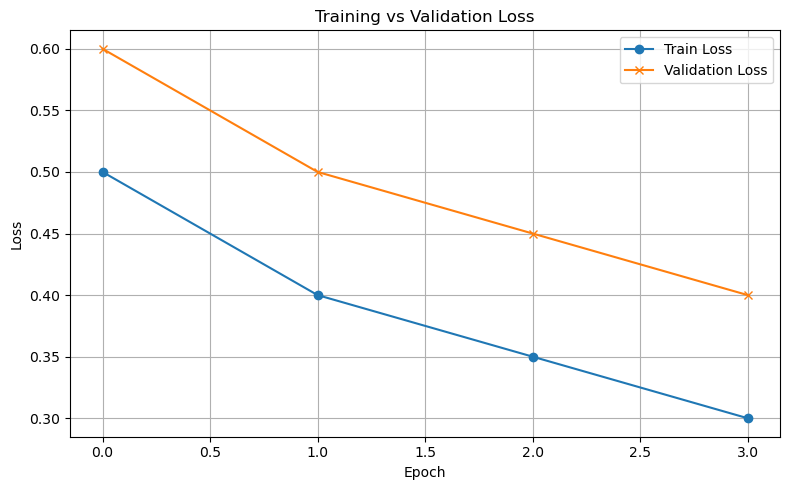

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
recommendations = recommender.get_recommendations(user_id=2, n_recommendations=10)

# Display recommendations
for rec in recommendations:
    print(f"Title: {rec['title']}")
    print(f"Predicted Rating: {rec['predicted_rating']:.2f}")
    print(f"Genres: {rec['genres']}")
    print()

Title: Delirium (2014)
Predicted Rating: 4.84
Genres: Adventure Romance Sci-Fi

Title: Strictly Sexual (2008)
Predicted Rating: 4.81
Genres: Comedy Drama Romance

Title: What's Your Number? (2011)
Predicted Rating: 4.79
Genres: Comedy Romance

Title: Submarine (2010)
Predicted Rating: 4.78
Genres: Comedy Drama Romance

Title: Deathgasm (2015)
Predicted Rating: 4.77
Genres: Comedy Horror

Title: Laggies (2014)
Predicted Rating: 4.75
Genres: Comedy Romance

Title: Phantom of the Paradise (1974)
Predicted Rating: 4.73
Genres: Comedy Fantasy Horror Musical Thriller

Title: Saving Santa (2013)
Predicted Rating: 4.72
Genres: Animation Children Comedy

Title: Scooby-Doo Goes Hollywood (1979)
Predicted Rating: 4.70
Genres: Animation Children Comedy

Title: Moonlight
Predicted Rating: 4.70
Genres: Drama

